In [68]:
import pandas as pd
import csv, sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns


In [69]:
df_stores = pd.read_csv('googleplaystore.csv')
df_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [70]:
df_stores = df_stores.dropna()
df_stores = df_stores.drop(columns = ['Last Updated','Current Ver','Android Ver'])

In [71]:
df_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [72]:
df_reviews = df_reviews.dropna()

In [73]:
df_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [74]:
df_stores.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle


In [75]:
len(df_stores)

9360

In [76]:
con = sqlite3.connect('Reviews.db')
cur = con.cursor()

In [77]:
%load_ext sql 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [78]:
%sql sqlite:///Reviews.db

In [79]:
df_reviews.to_sql('ReviewsTable',con,if_exists = 'replace',index = False)

37427

In [80]:
%%sql
SELECT 
    App, 
    COUNT(*) AS Total_Reviews,
    COUNT(CASE WHEN Sentiment like 'positive' THEN 1 END) AS Positive_Count,
    COUNT(CASE WHEN Sentiment like 'neutral' THEN 1 END) AS Neutral_Count,
    COUNT(CASE WHEN Sentiment like 'negative' THEN 1 END) AS Negative_Count
FROM 
    ReviewsTable
GROUP BY 
    App;


 * sqlite:///Reviews.db
Done.


App,Total_Reviews,Positive_Count,Neutral_Count,Negative_Count
10 Best Foods for You,194,162,22,10
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,40,31,8,1
11st,39,23,9,7
1800 Contacts - Lens Store,80,64,10,6
1LINE – One Line with One Touch,38,27,3,8
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,32,25,6,1
21-Day Meditation Experience,80,68,2,10
"2Date Dating App, Love and matching",38,26,5,7
2GIS: directory & navigator,40,23,11,6
2RedBeans,39,31,6,2


In [81]:
%%sql 
SELECT App, 
       COUNT(CASE WHEN Sentiment like 'negative' THEN 1 END) AS Negative_Count
FROM 
    ReviewsTable
GROUP BY App
ORDER BY Negative_Count DESC
limit 5
 

 * sqlite:///Reviews.db
Done.


App,Negative_Count
Angry Birds Classic,147
Candy Crush Saga,126
Bowmasters,119
8 Ball Pool,106
Candy Crush Soda Saga,96


In [82]:
%%sql 
SELECT App, 
       COUNT(CASE WHEN Sentiment like 'positive' THEN 1 END) AS Positive_Count
FROM 
    ReviewsTable
GROUP BY App
ORDER BY Positive_Count DESC
limit 5;
 

 * sqlite:///Reviews.db
Done.


App,Positive_Count
Helix Jump,209
Duolingo: Learn Languages Free,200
Calorie Counter - Macros,174
Calorie Counter - MyFitnessPal,169
Bowmasters,169


# Query for Contradictory Sentiment and Polarity

In [83]:
%%sql
SELECT *
FROM ReviewsTable
WHERE Sentiment = 'neutral' 
  AND (Sentiment_Polarity > 0.1 OR Sentiment_Polarity < -0.1);


 * sqlite:///Reviews.db
Done.


App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


# Query for Extremely High Subjectivity but Neutral Sentiment

In [84]:
%%sql

SELECT DISTINCT(App), COUNT(App) as Amount
FROM ReviewsTable
WHERE Sentiment like 'neutral' 
  AND Sentiment_Subjectivity > 0.8
GROUP BY App
ORDER BY Amount DESC

 * sqlite:///Reviews.db
Done.


App,Amount
"Hily: Dating, Chat, Match, Meet & Hook up",3
Badoo - Free Chat & Dating App,3
HotelTonight: Book amazing deals at great hotels,2
Hello Stars,2
Garden Fruit Legend,2
Food Network,2
Food Calorie Calculator,2
"FIFA - Tournaments, Soccer News & Live Scores",2
Etsy: Handmade & Vintage Goods,2
Episode - Choose Your Story,2


# Query to Find Reviews with Low Polarity but Strong Sentiment

In [85]:
%%sql
SELECT *
FROM ReviewsTable
WHERE (Sentiment like 'positive' OR Sentiment like 'negative') 
  AND ABS(Sentiment_Polarity) < 0.1


 * sqlite:///Reviews.db
Done.


App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"Is the development method completed in the early days, the computer web version and the mobile app, the function seems to be short or not the same in the same function page. For example, the similar work function of similar companies is not in the app version.",Positive,0.016666667,0.275
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Useful This useful Chinese difficult people's read Chinese. If add English language useful.,Positive,0.057142857,0.142857143
11st,Top bar missing newest update. Hard shop can't search...,Positive,0.002777778,0.363888889
11st,forced full screen popups,Positive,0.025,0.375
11st,Icon name is strange after updating,Negative,-0.05,0.15
11st,It has been slowed down since the last update. It's hard for me to pay for the product ... I'll give up when I'm alive.,Negative,-0.086805556,0.324305556
1LINE – One Line with One Touch,Love game deleting I've waiting 3 months levels play. I several updates none updates added new levels,Positive,0.059090909,0.363636364
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,"last update bug...i can't open keyboard setting, always fc , i'm back old version",Positive,0.025,0.191666667
21-Day Meditation Experience,Deeply disappointed. My free 21 days longer works. It asking high price meditations. I expect Oprah involved scam. I respect her.,Negative,-0.063333333,0.696666667
21-Day Meditation Experience,This good ever I get notification phone stops meditation playing annoying I press play disturbs meditation. I prefer ed upgrade,Negative,-0.05,0.75


# Query to Detect Extremely Polarized Reviews

In [86]:
%%sql
SELECT *
FROM ReviewsTable
WHERE Sentiment_Polarity > 0.9 OR Sentiment_Polarity < -0.9;


 * sqlite:///Reviews.db
Done.


App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.0,0.533333333
10 Best Foods for You,Best idea us,Positive,1.0,0.3
10 Best Foods for You,Best way,Positive,1.0,0.3
10 Best Foods for You,Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!,Positive,0.9921875,0.866666667
10 Best Foods for You,One greatest apps.,Positive,1.0,1.0
10 Best Foods for You,Good.!!,Positive,1.0,0.6
10 Best Foods for You,Best,Positive,1.0,0.3
10 Best Foods for You,Wonderful,Positive,1.0,1.0
10 Best Foods for You,10 best foods 4u Excellent chose foods,Positive,1.0,0.65
10 Best Foods for You,Best food Thank you recipe book,Positive,1.0,0.3


# Query to Find Reviews with High Subjectivity for Negative Sentiments

In [87]:
%%sql
SELECT *
FROM ReviewsTable
WHERE Sentiment = 'negative' 
  AND Sentiment_Subjectivity > 0.8;


 * sqlite:///Reviews.db
Done.


App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [88]:
# from textblob import TextBlob

# # Sample review
# review = "The app is fantastic but sometimes it crashes."

# # Analyze sentiment
# blob = TextBlob(review)
# sentiment_polarity = blob.sentiment.polarity  # Range from -1 (negative) to +1 (positive)
# sentiment_subjectivity = blob.sentiment.subjectivity  # Range from 0 (objective) to 1 (subjective)

# print(f"Polarity: {sentiment_polarity}, Subjectivity: {sentiment_subjectivity}")


Polarity: 0.4, Subjectivity: 0.9


In [89]:
# from transformers import pipeline

# # Load the specific pre-trained sentiment analysis model
# classifier = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

# # Sample review

# review = "The app has a good design, but it crashes too often."

# # Predict sentiment
# result = classifier(review)
# print(result)


In [90]:
import torch
print(torch.__version__)


2.5.0+cpu


In [91]:
df_stores.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [92]:
df_stores['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [123]:
import pandas as pd
def rating_to_sentiment(rating):
    if rating < 3.0:  
        return 'Negative'
    elif rating == 3.0:  
        return 'Neutral'
    elif rating > 3.0:  
        return 'Positive'
    else:
        return 'Unknown'
df_stores['Sentiment'] = df_stores['Rating'].apply(rating_to_sentiment)

# Check the updated DataFrame
print(df_stores[['App', 'Rating', 'Sentiment']])

                                                     App  Rating Sentiment
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1  Positive
1                                    Coloring book moana     3.9  Positive
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7  Positive
3                                  Sketch - Draw & Paint     4.5  Positive
4                  Pixel Draw - Number Art Coloring Book     4.3  Positive
...                                                  ...     ...       ...
10834                                      FR Calculator     4.0  Positive
10836                                   Sya9a Maroc - FR     4.5  Positive
10837                   Fr. Mike Schmitz Audio Teachings     5.0  Positive
10839                      The SCP Foundation DB fr nn5n     4.5  Positive
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  Positive

[9360 rows x 3 columns]


In [ ]:
category_mapping = {
    'ART_AND_DESIGN': 'Lifestyle & Personal Use',
    'AUTO_AND_VEHICLES': 'Travel & Utilities',
    'BEAUTY': 'Lifestyle & Personal Use',
    'BOOKS_AND_REFERENCE': 'Education & Reference',
    'BUSINESS': 'Business & Productivity',
    'COMICS': 'Entertainment & Media',
    'COMMUNICATION': 'Communication & Social',
    'DATING': 'Communication & Social',
    'EDUCATION': 'Education & Reference',
    'ENTERTAINMENT': 'Entertainment & Media',
    'EVENTS': 'Entertainment & Media',
    'FINANCE': 'Business & Productivity',
    'FOOD_AND_DRINK': 'Lifestyle & Personal Use',
    'HEALTH_AND_FITNESS': 'Lifestyle & Personal Use',
    'HOUSE_AND_HOME': 'Lifestyle & Personal Use',
    'LIBRARIES_AND_DEMO': 'Education & Reference',
    'LIFESTYLE': 'Lifestyle & Personal Use',
    'GAME': 'Entertainment & Media',
    'FAMILY': 'Entertainment & Media',
    'MEDICAL': 'Travel & Utilities',
    'SOCIAL': 'Communication & Social',
    'SHOPPING': 'Travel & Utilities',
    'PHOTOGRAPHY': 'Communication & Social',
    'SPORTS': 'Travel & Utilities',
    'TRAVEL_AND_LOCAL': 'Travel & Utilities',
    'TOOLS': 'Business & Productivity',
    'PERSONALIZATION': 'Lifestyle & Personal Use',
    'PRODUCTIVITY': 'Business & Productivity',
    'PARENTING': 'Lifestyle & Personal Use',
    'WEATHER': 'Travel & Utilities',
    'VIDEO_PLAYERS': 'Communication & Social',
    'NEWS_AND_MAGAZINES': 'Entertainment & Media',
    'MAPS_AND_NAVIGATION': 'Travel & Utilities'
}

df_stores['Group'] = df_stores['Category'].map(category_mapping)


In [94]:
df_stores['Group'].unique()

array(['Lifestyle & Personal Use', 'Travel & Utilities',
       'Education & Reference', 'Business & Productivity',
       'Entertainment & Media', 'Communication & Social'], dtype=object)

In [95]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Group           9360 non-null   object 
dtypes: float64(1), object(10)
memory usage: 877.5+ KB


In [96]:
df_stores['Reviews'] = df_stores['Reviews'].astype('int')

In [97]:
import pandas as pd
def convert_size(size):
    if isinstance(size, str):  # Check if size is a string
        if size == 'Varies with device':
            return 0.0  # Replace with 0.0
        elif size.endswith('M'):
            return float(size[:-1])  
    return 0.0  # Return 0.0 for NaN or non-string values

df_stores['Size'] = df_stores['Size'].apply(convert_size)

df_stores['Size'] = df_stores['Size'].astype('float64')


In [98]:
df_stores['Installs'] = df_stores['Installs'].str.replace('+', '').str.replace(',', '').str.strip()

In [99]:
df_stores['Installs'] = df_stores['Installs'].astype('int64') 

In [100]:
df_stores['Price'] = df_stores['Price'].str.replace('$', '').str.strip()

In [101]:
df_stores['Price'] = df_stores['Price'].astype('float64')

In [102]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Group           9360 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 840.9+ KB


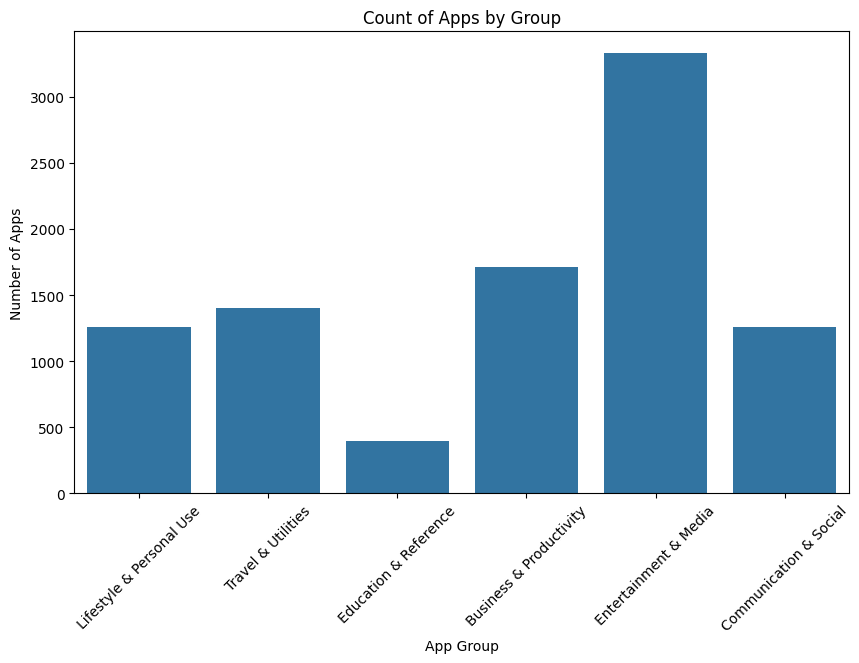

In [103]:
# 1. Count of Apps by Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Group', data=df_stores)
plt.title('Count of Apps by Group')
plt.xlabel('App Group')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

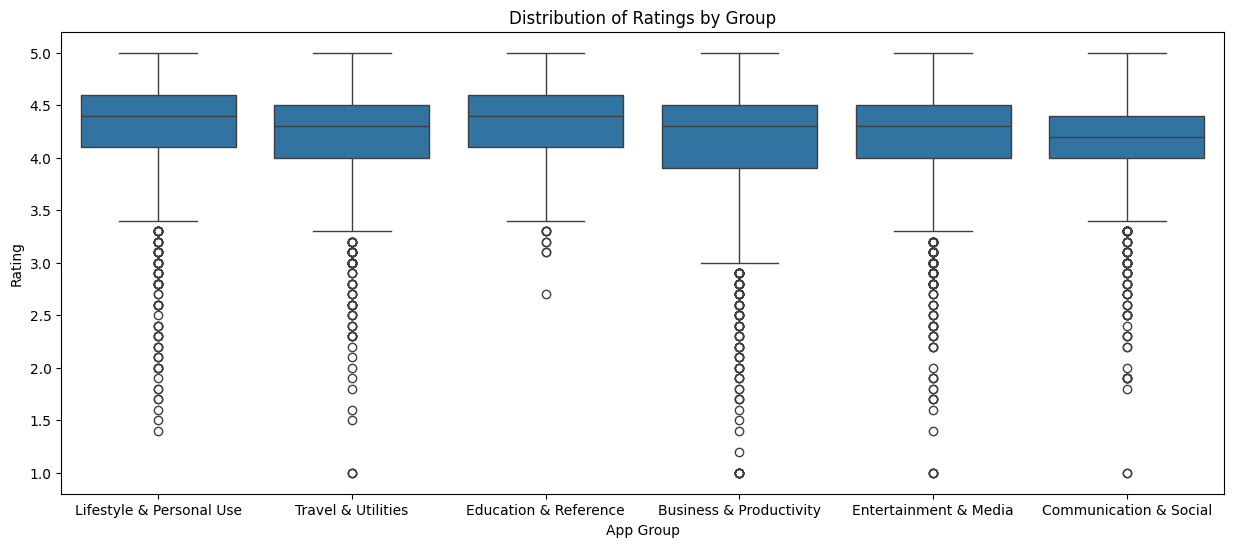

In [104]:
# 2. Distribution of Ratings by Group
plt.figure(figsize=(15, 6))
sns.boxplot(x='Group', y='Rating', data=df_stores)
plt.title('Distribution of Ratings by Group')
plt.xlabel('App Group')
plt.ylabel('Rating')
plt.show()

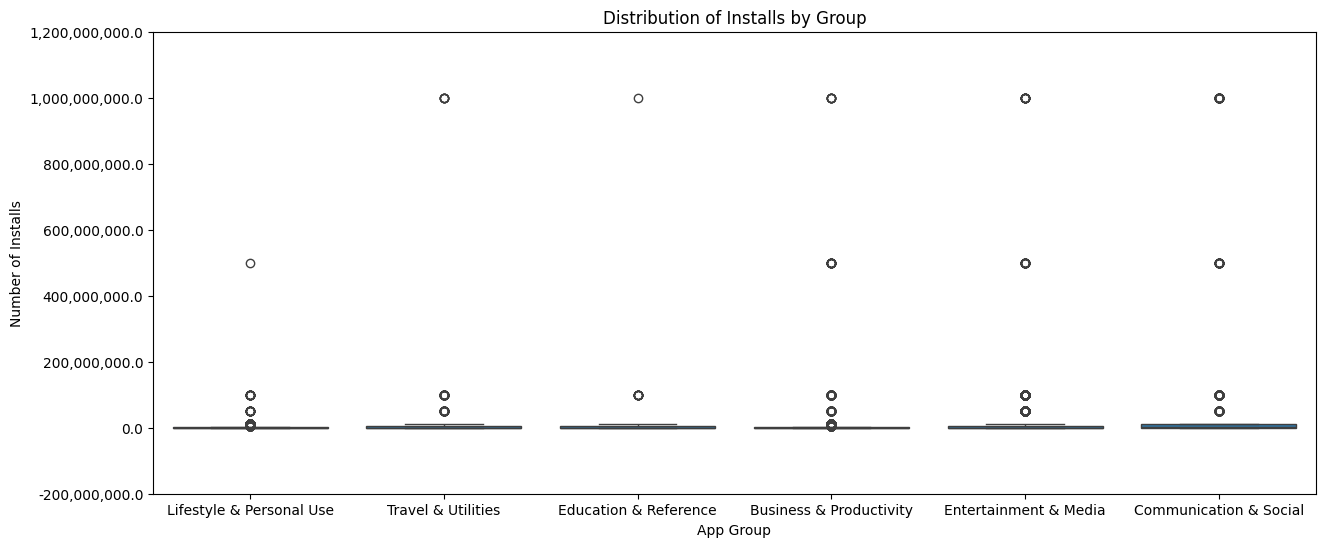

In [105]:
# 3. Installs by Group
plt.figure(figsize=(15, 6))
sns.boxplot(x='Group', y='Installs', data=df_stores)
plt.title('Distribution of Installs by Group')
yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10**(0)):,.1f}' for tick in yticks])
plt.xlabel('App Group')
plt.ylabel('Number of Installs')
plt.show()

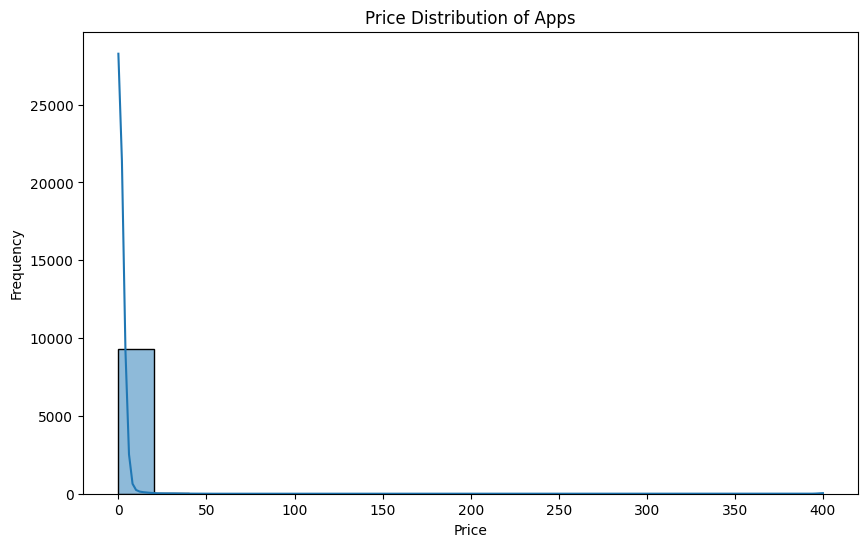

In [106]:
# 4. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_stores['Price'], bins=20, kde=True)
plt.title('Price Distribution of Apps')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

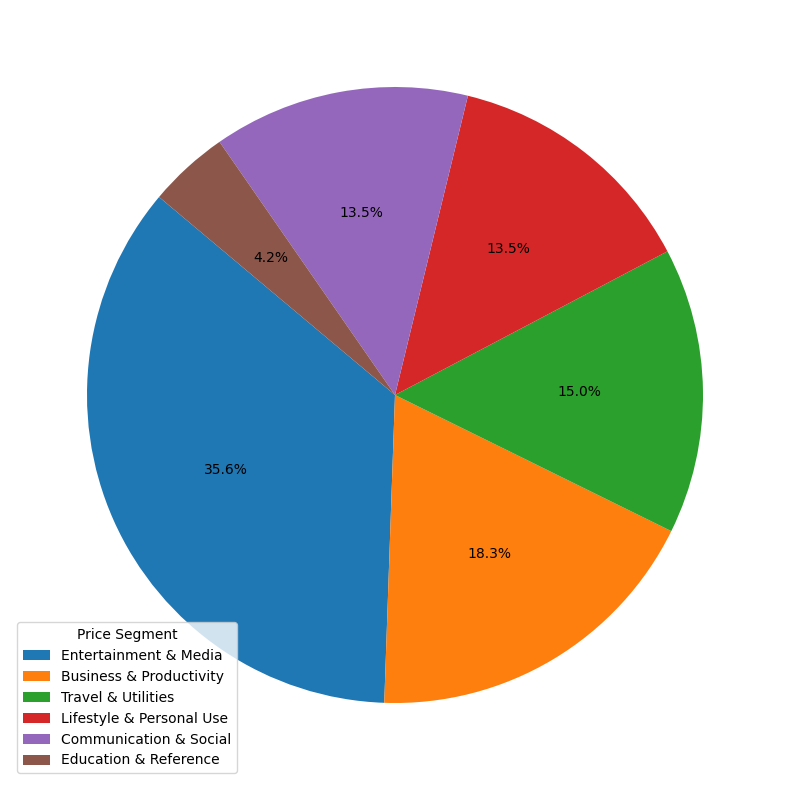

In [107]:
group_value_count = df_stores['Group'].value_counts()
plt.figure(figsize = (15,10))
plt.pie(group_value_count, autopct='%1.1f%%', startangle=140)
plt.legend(group_value_count.index, title="Price Segment", loc="best")

plt.show()

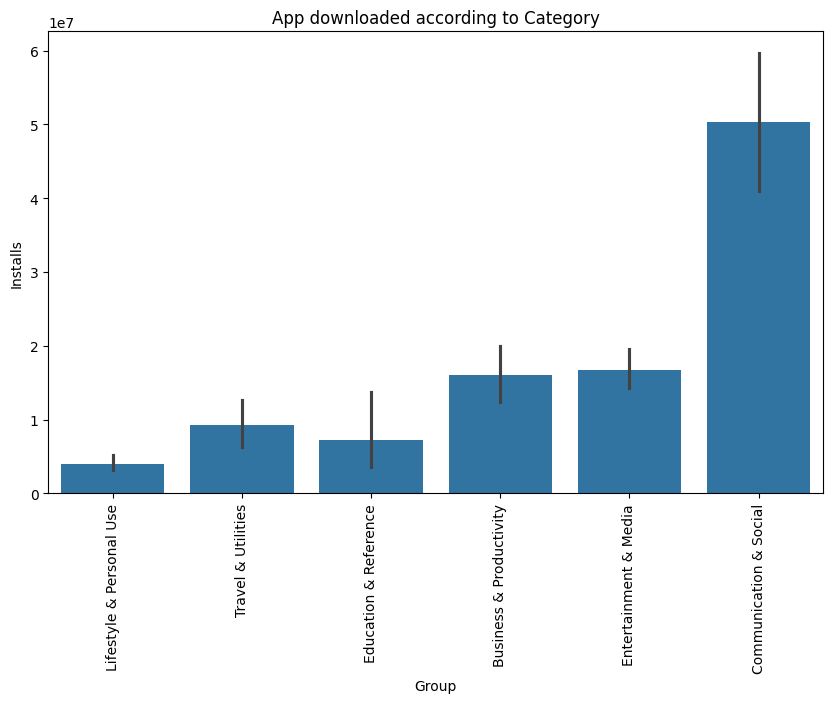

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Installs', data=df_stores)
plt.xticks(rotation=90)
plt.title('App downloaded according to Category')
plt.show()


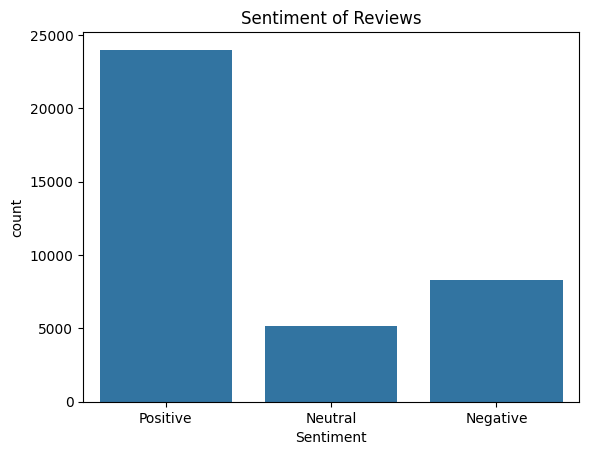

In [109]:
sns.countplot(x='Sentiment', data=df_reviews)
plt.title('Sentiment of Reviews')
plt.show()


In [126]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_stores['Sentiment_Encoded'] = label_encoder.fit_transform(df_stores['Sentiment'])

# Check the updated DataFrame
print(df_stores[['App', 'Rating', 'Sentiment', 'Sentiment_Encoded']])


                                                     App  Rating Sentiment  \
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1  Positive   
1                                    Coloring book moana     3.9  Positive   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7  Positive   
3                                  Sketch - Draw & Paint     4.5  Positive   
4                  Pixel Draw - Number Art Coloring Book     4.3  Positive   
...                                                  ...     ...       ...   
10834                                      FR Calculator     4.0  Positive   
10836                                   Sya9a Maroc - FR     4.5  Positive   
10837                   Fr. Mike Schmitz Audio Teachings     5.0  Positive   
10839                      The SCP Foundation DB fr nn5n     4.5  Positive   
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  Positive   

       Sentiment_Encoded  
0                      2  
1        

In [127]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 10000  # Number of words to consider as features
max_len = 100  # Maximum length of each review

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_stores['Reviews'])
sequences = tokenizer.texts_to_sequences(df_stores['Reviews'])

# Pad sequences
X = pad_sequences(sequences, maxlen=max_len)
y = df_stores['Sentiment_Encoded'].values


ModuleNotFoundError: No module named 'keras.preprocessing.text'